# Exercise 05 : Boxplot

## Import

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Read file

In [2]:
ab_test_df = pd.read_csv('../data/ab-test.csv')
ab_test_df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [3]:
ab_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uid     44 non-null     object 
 1   diff    44 non-null     float64
 2   time    44 non-null     object 
 3   group   44 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


## Create a graph

In [4]:
ab_before = ab_test_df[ab_test_df['time'] == 'before'][['group', 'diff']]
ab_before = [ab_before[ab_before['group'] == group]['diff'].tolist() for group in ('control', 'test')]
ab_after = ab_test_df[ab_test_df['time'] == 'after'][['group', 'diff']]
ab_after = [ab_after[ab_after['group'] == group]['diff'].tolist() for group in ('control', 'test')]

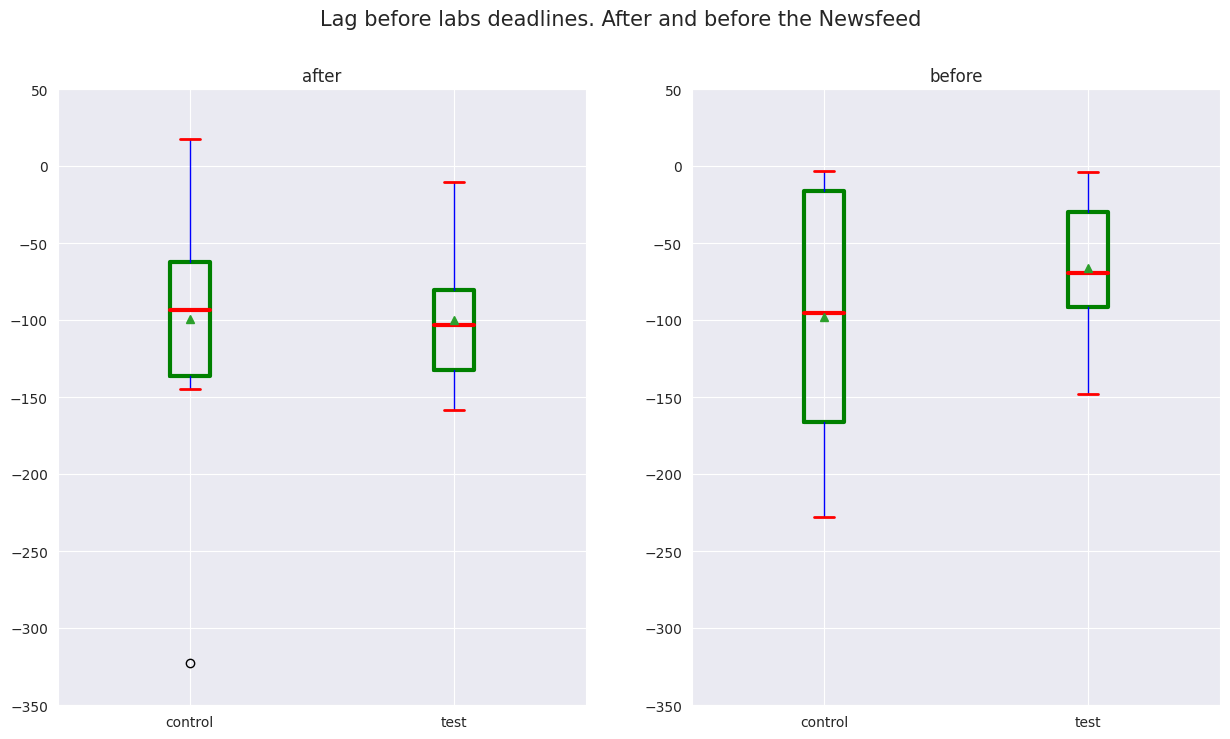

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
major_ticks = range(-350, 51, 50)

axs[0].boxplot(ab_after, labels=['control', 'test'], showmeans=True, boxprops={ 'color': 'green', 'linewidth': 3 }, whiskerprops={ 'color': 'blue'},capprops={ 'color': 'red', 'linewidth': 2 }, medianprops={ 'color': 'red', 'linewidth': 3 })
axs[0].set_title('after')
axs[0].set_yticks(major_ticks)
axs[0].grid('xy')

axs[1].boxplot(ab_before, labels=['control', 'test'], showmeans=True, boxprops={ 'color': 'green', 'linewidth': 3 }, whiskerprops={ 'color': 'blue' }, capprops={ 'color': 'red', 'linewidth': 2 }, medianprops={ 'color': 'red', 'linewidth': 3 })
axs[1].set_title('before')
axs[1].set_yticks(major_ticks)
axs[1].grid('xy')



plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

## What was the IQR of the control group before the newsfeed?

In [6]:
iqr_before = ab_test_df[(ab_test_df['time'] == 'before') & (ab_test_df['group'] == 'control')].describe().loc['75%'].values[0] -  ab_test_df[(ab_test_df['time'] == 'before') & (ab_test_df['group'] == 'control')].describe().loc['25%'].values[0]
round(iqr_before / 10) * 10

150

In [7]:
iqr_after = ab_test_df[(ab_test_df['time'] == 'after') & (ab_test_df['group'] == 'control')].describe().loc['75%'].values[0] -  ab_test_df[(ab_test_df['time'] == 'after') & (ab_test_df['group'] == 'control')].describe().loc['25%'].values[0]
round(iqr_after / 10) * 10

70